# Airline Sentiment analysis using RNN

Import libraries

In [1]:
import re
import warnings
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
# from keras.preprocessing.text import Tokenizer
# from keras.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore",category=FutureWarning)

Reading the data set

In [2]:
data = pd.read_csv("Tweets.csv")
df = data[["text","airline_sentiment"]]
# lstrip removes prefix beginning of a string, rstrip removes suffix @ of a string.
df['text'] = df['text'].map(lambda x: x.lstrip('@VirginAmerica@UnitedAir@Southwestairline@DeltaAir@USAirways@American').rstrip('@'))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22152\1370393040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].map(lambda x: x.lstrip('@VirginAmerica@UnitedAir@Southwestairline@DeltaAir@USAirways@American').rstrip('@'))


In [3]:
df

,text,airline_sentiment
0,What @dhepburn said.,neutral
1,plus you've added commercials to the experien...,positive
2,I didn't today... Must mean I need to take an...,neutral
3,"it's really aggressive to blast obnoxious ""en...",negative
4,and it's a really big bad thing about it,negative
...,...,...
14635,thank you we got on a different flight to Chi...,positive
14636,leaving over 20 minutes Late Flight. No warni...,negative
14637,Please bring American Airlines to #BlackBerry10,neutral
14638,"you have my money, you change my flight, and ...",negative


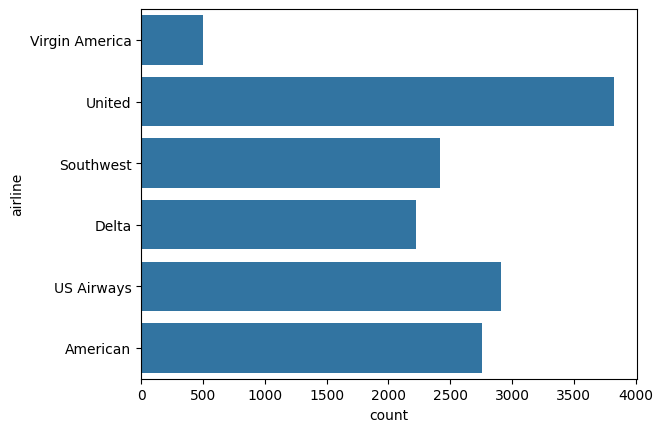

In [4]:
sns.countplot(data.airline);

In [5]:
df = df[df.airline_sentiment!="neutral"] # To remove neutral responses
df['text'] = df['text'].apply(lambda x: x.lower()) # To lower 
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) # To keep numbers and strings only

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22152\1447107429.py:3: SyntaxWarning: invalid escape sequence '\s'
  df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) # To keep numbers and strings only
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22152\1447107429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: x.lower()) # To lower
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22152\1447107429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [6]:
df.head(5)

,text,airline_sentiment
1,plus youve added commercials to the experienc...,positive
3,its really aggressive to blast obnoxious ente...,negative
4,and its a really big bad thing about it,negative
5,seriously would pay 30 a flight for seats tha...,negative
6,yes nearly every time i fly vx this ear worm ...,positive


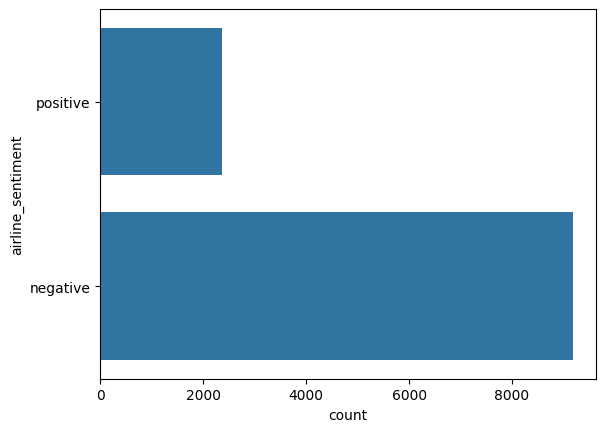

In [7]:
sns.countplot(df.airline_sentiment);#Mostly Negative Reviews(Class Imbalance found) 

In [8]:
df = df.drop(df[df.airline_sentiment == 'negative'].iloc[:5000].index)

In [9]:
df

,text,airline_sentiment
1,plus youve added commercials to the experienc...,positive
6,yes nearly every time i fly vx this ear worm ...,positive
8,virginamerica well i didntbut now i do d,positive
9,it was amazing and arrived an hour early your...,positive
11,i lt3 pretty graphics so much better than min...,positive
...,...,...
14633,my flight was cancelled flightled leaving tom...,negative
14634,right on cue with the delays,negative
14635,thank you we got on a different flight to chi...,positive
14636,leaving over 20 minutes late flight no warnin...,negative


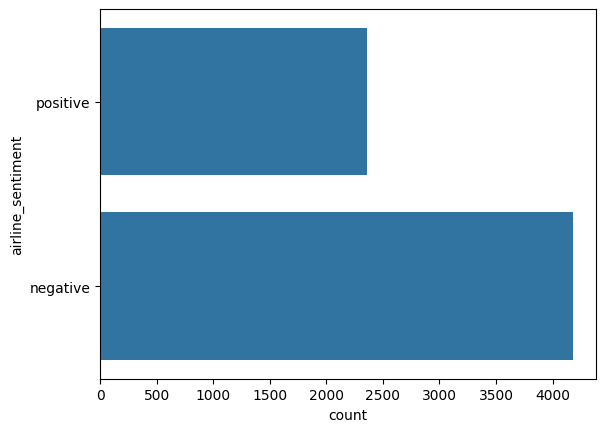

In [10]:
sns.countplot(df.airline_sentiment);

In [11]:
max_fatures = 4000
tokenizer = Tokenizer(num_words = max_fatures, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)
Y = df['airline_sentiment']
L = Y.values
X
L

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'negative'], dtype=object)

In [12]:
k = []
for i in range(6541):
    if L[i]=="negative":
                        k.append(0)
    elif L[i]=="positive":
                        k.append(1)


In [13]:
k

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


Train test split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, k, 
                                                    test_size=0.3, 
                                                    shuffle = True,
                                                    stratify = k,
                                                    random_state = 1 )

Define the model

In [15]:
embed_dim = 128
lstm_out = 196
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_fatures, 128, input_length=X_train.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.5))
model.add(tf.keras.layers.LSTM(196, dropout = 0.3, recurrent_dropout = 0.3 ))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
model

<Sequential name=sequential, built=False>

In [17]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training the model

In [30]:
print(type(Y_train))
Y_train = np.array(Y_train)

<class 'numpy.ndarray'>


In [24]:
Model = model.fit(X_train,
                 Y_train,
                 epochs=20,
                 batch_size=32,
                 validation_split=0.2,
                 verbose=2)


Epoch 1/20
115/115 - 6s - 56ms/step - accuracy: 0.7660 - loss: 0.4912 - val_accuracy: 0.8603 - val_loss: 0.3358
Epoch 2/20
115/115 - 3s - 26ms/step - accuracy: 0.8949 - loss: 0.2658 - val_accuracy: 0.8766 - val_loss: 0.2945
Epoch 3/20
115/115 - 3s - 26ms/step - accuracy: 0.9336 - loss: 0.1723 - val_accuracy: 0.9138 - val_loss: 0.2189
Epoch 4/20
115/115 - 3s - 27ms/step - accuracy: 0.9574 - loss: 0.1225 - val_accuracy: 0.9236 - val_loss: 0.2196
Epoch 5/20
115/115 - 3s - 27ms/step - accuracy: 0.9670 - loss: 0.0964 - val_accuracy: 0.9192 - val_loss: 0.2256
Epoch 6/20
115/115 - 3s - 26ms/step - accuracy: 0.9762 - loss: 0.0667 - val_accuracy: 0.9028 - val_loss: 0.2881
Epoch 7/20
115/115 - 3s - 26ms/step - accuracy: 0.9823 - loss: 0.0568 - val_accuracy: 0.9192 - val_loss: 0.2742
Epoch 8/20
115/115 - 3s - 30ms/step - accuracy: 0.9801 - loss: 0.0532 - val_accuracy: 0.8952 - val_loss: 0.3157
Epoch 9/20
115/115 - 4s - 33ms/step - accuracy: 0.9847 - loss: 0.0447 - val_accuracy: 0.8941 - val_loss:

In [34]:
print(type(X_test))
X_test = np.array(X_test)
print(type(Y_test))
Y_test = np.array(Y_test)

<class 'numpy.ndarray'>
<class 'list'>


In [35]:
score = model.evaluate(x=X_test, y=Y_test, verbose=False)
print("loss = ",score[0])
print("accuracy = ",score[1])


loss =  0.6387635469436646
accuracy =  0.8909831643104553


In [36]:
score

[0.6387635469436646, 0.8909831643104553]

Plotting the confusion matrix

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


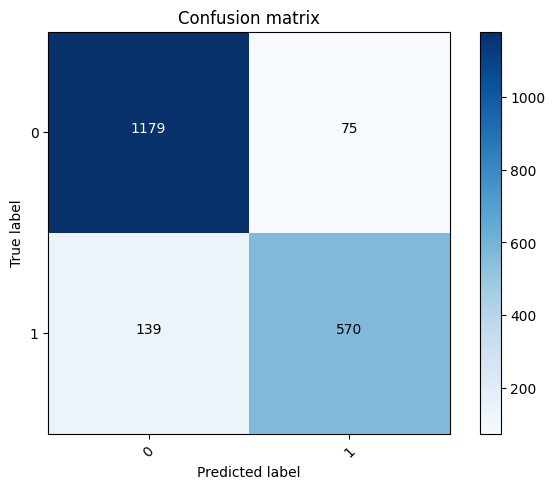

In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
confusion_mtx = confusion_matrix(Y_test, y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

In [42]:
y_pred, y_pred_classes, confusion_mtx

(array([[2.3454225e-04, 9.9976546e-01],
        [9.9999964e-01, 3.3972788e-07],
        [8.1901569e-03, 9.9180990e-01],
        ...,
        [2.9544788e-06, 9.9999702e-01],
        [3.3786162e-07, 9.9999964e-01],
        [2.1166669e-07, 9.9999976e-01]], dtype=float32),
 array([1, 0, 1, ..., 1, 1, 1], dtype=int64),
 array([[1179,   75],
        [ 139,  570]], dtype=int64))

model test

In [64]:
sample = ['Meetings: Air crew is so dumb.']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=31, dtype='int32', value=0)
print(sample)
sentiment = model.predict(sample,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0 2030  237  147
    11   40 2049]]
1/1 - 0s - 41ms/step
negative


In [65]:
sample = ['Really missed a prime opportunity for Men Without Hats parody, there.']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=31, dtype='int32', value=0)
print(sample)
sentiment = model.predict(sample,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0  125  254    6 3758 1423    5
   322 2882   82]]
1/1 - 0s - 40ms/step
negative


In [67]:
sample = ['what is going on with customer service? Is there anyway to speak to a human asap? Thank you.']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=31, dtype='int32', value=0)
print(sample)
sentiment = model.predict(sample,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0  61  11 132   9  23
   42  28  11  82 764   1 277   1   6 494 720  33   4]]
1/1 - 0s - 41ms/step
positive
